# Sales Forecasting and EDA 

Part 1: Exploratory Data Analysis

In [46]:
#import the necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import matplotlib.ticker as ticker

In [47]:
df = pd.read_csv('train.csv') #Read the dataset

**Let's take a look at the dataset**

In [48]:
df.head()

,Product_id,Stall_no,instock_date,Market_Category,Customer_name,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price
0,BRAE2NF6JA5GUEXG,37.0,2015-08-22 18:36:12.000,2,Lillyann,Yes,Fashion,1,68,0.0,376.0,11.0,2983.0,4713.0,4185.947700
1,TUNE8SFB6RJN2HSD,38.0,2016-03-27 21:19:13.000,24,Klynn,Yes,Fashion,0,51,0.0,397.0,12.0,7495.0,10352.0,9271.490256
2,BRAEAR7WZPQGPBZU,9.0,2015-08-18 19:25:22.000,447,Ridge,Yes,Child_care,0,10,0.0,250.0,9.0,5752.0,7309.0,6785.701362
3,WATDZ2ZQ8JPDHCTJ,50.0,2016-03-28 21:53:01.000,23,Abran,Yes,Educational,2,48,0.0,144.0,13.0,5090.0,20814.0,13028.917824
4,JWSEBUKYQPMBZ3RK,7.0,2016-03-29 22:58:53.000,63,Dustyn,Yes,Repair,1,35,1.0,211.0,4.0,2430.0,9261.0,906.553935


In [49]:
df.describe() #Describing the data 

,Stall_no,Market_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price
count,6363.000000,6368.000000,6368.000000,6368.000000,6330.000000,6170.000000,6163.000000,6330.000000,6025.000000,6327.000000
mean,25.309445,199.340609,0.643687,50.921168,0.140442,264.514100,10.146195,3531.349763,6432.545892,4563.242592
std,14.328980,170.275570,1.025092,29.091922,0.347473,124.483056,4.318339,2194.729604,3716.177364,2979.102408
min,1.000000,0.000000,0.000000,1.000000,0.000000,100.000000,1.000000,1.000000,404.000000,-6062.470000
25%,13.000000,55.000000,0.000000,26.000000,0.000000,163.000000,7.000000,1879.250000,3918.000000,2450.005280
50%,25.000000,132.000000,0.000000,51.000000,0.000000,252.000000,10.000000,3157.500000,5634.000000,4210.384640
75%,37.000000,403.000000,2.000000,76.000000,0.000000,314.000000,14.000000,4697.000000,8126.000000,6167.643252
max,50.000000,471.000000,3.000000,100.000000,1.000000,649.000000,17.000000,17580.000000,58812.000000,22638.325941


In [50]:
k=["Product_id","instock_date","Customer_name"]

In [51]:
df.drop(k,axis = 1, inplace = True) #Dropping the Row ID column
 

In [52]:
df.head()

,Stall_no,Market_Category,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price
0,37.0,2,Yes,Fashion,1,68,0.0,376.0,11.0,2983.0,4713.0,4185.947700
1,38.0,24,Yes,Fashion,0,51,0.0,397.0,12.0,7495.0,10352.0,9271.490256
2,9.0,447,Yes,Child_care,0,10,0.0,250.0,9.0,5752.0,7309.0,6785.701362
3,50.0,23,Yes,Educational,2,48,0.0,144.0,13.0,5090.0,20814.0,13028.917824
4,7.0,63,Yes,Repair,1,35,1.0,211.0,4.0,2430.0,9261.0,906.553935


**checking if there is any null data or not**

In [53]:
print(df.isnull().sum())

Stall_no              5
Market_Category       0
Loyalty_customer      0
Product_Category      0
Grade                 0
Demand                0
Discount_avail       38
charges_1           198
charges_2 (%)       205
Minimum_price        38
Maximum_price       343
Selling_Price        41
dtype: int64


In [54]:
df[df['Selling_Price'].isnull()]

,Stall_no,Market_Category,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price
64,2.0,268,Yes,Hospitality,2,28,NaN,340.0,9.0,945.0,2956.0,NaN
516,7.0,447,Yes,Repair,0,36,1.0,219.0,3.0,5514.0,8055.0,NaN
536,45.0,14,No,Repair,0,37,0.0,268.0,3.0,3021.0,4135.0,NaN
1037,39.0,14,Yes,Repair,0,88,0.0,295.0,8.0,7314.0,NaN,NaN
1105,27.0,198,Yes,Technology,0,91,0.0,594.0,13.0,2138.0,3167.0,NaN
1211,10.0,447,No,Hospitality,0,4,0.0,205.0,7.0,3041.0,4063.0,NaN
1275,38.0,320,No,Educational,0,21,0.0,145.0,12.0,1860.0,5149.0,NaN
1460,15.0,80,Yes,Repair,0,58,0.0,273.0,3.0,1928.0,4193.0,NaN
1551,49.0,268,No,Technology,2,96,1.0,531.0,8.0,2892.0,9483.0,NaN
1679,32.0,91,Yes,Home_decor,0,79,1.0,285.0,NaN,2413.0,5683.0,NaN


In [55]:
print(df.isnull().sum())

Stall_no              5
Market_Category       0
Loyalty_customer      0
Product_Category      0
Grade                 0
Demand                0
Discount_avail       38
charges_1           198
charges_2 (%)       205
Minimum_price        38
Maximum_price       343
Selling_Price        41
dtype: int64


In [56]:
#df['Selling_Price'].fillna((df['Selling_Price'].mean()), inplace=True)

**<h3>Let's find out who are the Most Valuable customers!</h3>**

The Most Valuable Customers are the customers who are the most profitable for a company. <br>
These customers buy more or higher-value products than the average customer.

In [57]:
Top_products = df.groupby(["Product_Category"]).sum().sort_values("Selling_Price", ascending=False).head(20) # Sort the Customers as per the sales
Top_products = Top_products[["Selling_Price"]].round(2) # Round off the Sales Value up to 2 decimal places
Top_products.reset_index(inplace=True) # Since we have used groupby, we will have to reset the index to add the customer name into dataframe 

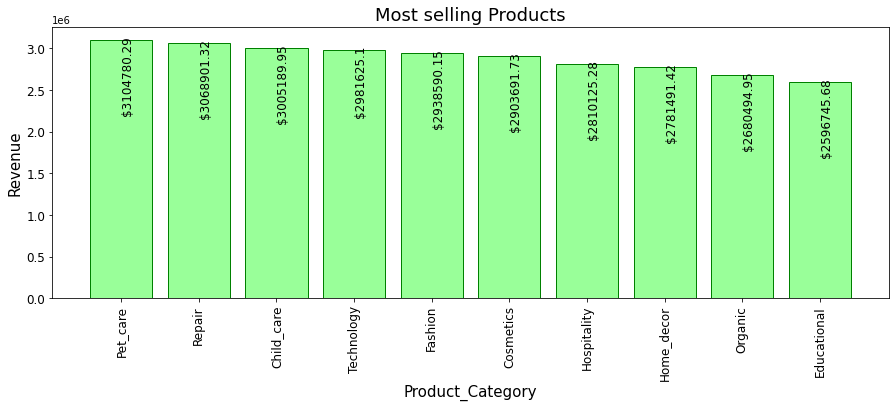

In [60]:
plt.figure(figsize = (15,5)) # width and height of figure is defined in inches
plt.title("Most selling Products", fontsize=18) 
plt.bar(Top_products["Product_Category"], Top_products["Selling_Price"],color= '#99ff99',edgecolor='green', linewidth = 1)
plt.xlabel("Product_Category",fontsize=15) # x axis shows the customers 
plt.ylabel("Revenue",fontsize=15) # y axis shows the Revenue
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12)
for k,v in Top_products["Selling_Price"].items(): #To show the exact revenue generated on the figure
    plt.text(k,v-8000,'$'+ str(v), fontsize=12,rotation=90,color='k', verticalalignment='center_baseline');

**<h3>Let's look at the revenue generated by each category!</h3>**

In [75]:
Top_category = df.groupby(["Product_Category"]).sum().sort_values("Selling_Price", ascending=False)  # Sort the Categories as per the sales
Top_category = Top_category[["Selling_Price"]] # keep only the sales column in the dataframe
total_revenue_category = Top_category["Selling_Price"].sum() # To find the total revenue generated as per category
total_revenue_category = str(int(total_revenue_category)) # Convert the total_revenue_category from float to int and then to string
total_revenue_category = '$' + total_revenue_category # Adding '$' sign before the Value
Top_category.reset_index(inplace=True) # Since we have used groupby, we will have to reset the index to add the category into the dataframe

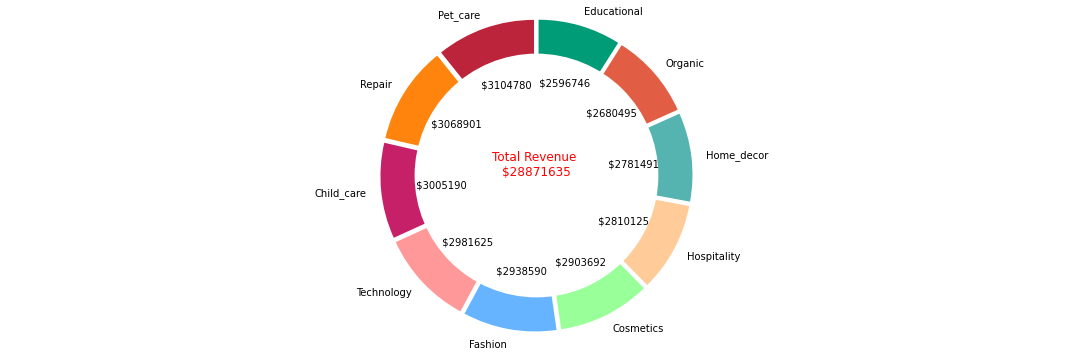

In [82]:
plt.rcParams["figure.figsize"] = (15,5) # width and height of figure is defined in inches
plt.rcParams['font.size'] = 10.0 # Font size is defined
plt.rcParams['font.weight'] = 5 # Font weight is defined
# we don't want to look at the percentage distribution in the pie chart. Instead, we want to look at the exact revenue generated by the categories.
def autopct_format(values): 
    def my_format(pct): 
        total = sum(values) 
        val = int(round(pct*total/100.0))
        return ' ${v:d}'.format(v=val)
    return my_format
colors = ['#BC243C','#FE840E','#C62168','#ff9999','#66b3ff','#99ff99','#ffcc99','#55B4B0','#E15D44','#009B77',] # Colors are defined for the pie chart
explode = (0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,)
fig1, ax1 = plt.subplots()
ax1.pie(Top_category['Selling_Price'], colors = colors, labels=Top_category['Product_Category'], autopct= autopct_format(Top_category['Selling_Price']), startangle=90,explode=explode)
centre_circle = plt.Circle((0,0),0.82,fc='white') # drawing a circle on the pie chart to make it look better 
fig = plt.gcf()
fig.gca().add_artist(centre_circle) # Add the circle on the pie chart
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal') 
# we can look the total revenue generated by all the categories at the center
label = ax1.annotate('Total Revenue \n'+str(total_revenue_category),color = 'red', xy=(0, 0), fontsize=12, ha="center")
plt.tight_layout()
plt.show()

In [79]:
# Sort both category and  sub category as per the sales
Top_subcat = df.groupby(['Product_Category','Loyalty_customer']).sum().sort_values("Selling_Price", ascending=False).head(10)
Top_subcat = Top_subcat[["Selling_Price"]].astype(int) # Cast Sales column to integer data type
Top_subcat = Top_subcat.sort_values("Product_Category") # Sort the values as per Category
Top_subcat.reset_index(inplace=True) # Since we have used groupby, we will have to reset the index to add both columns into data frame
Top_subcat_1 = Top_subcat.groupby(['Product_Category']).sum() # Calculated the total Sales of all the categories
Top_subcat_1.reset_index(inplace=True) # Reset the index

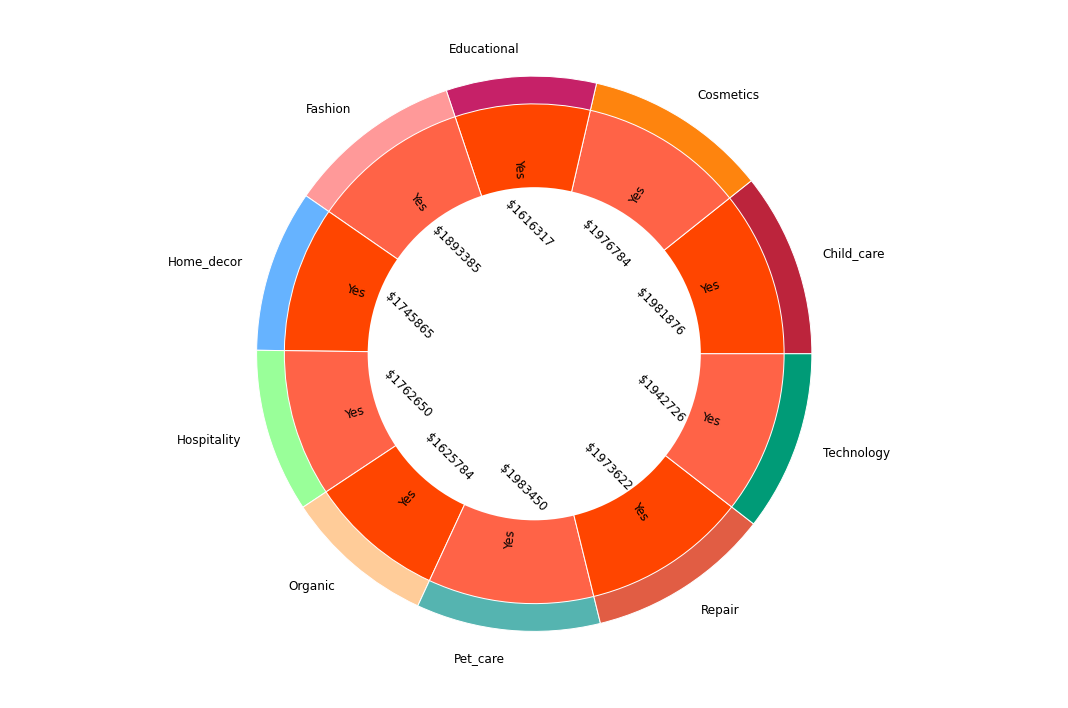

In [81]:
plt.rcParams["figure.figsize"] = (15,10) # width and height of figure is defined in inches
fig, ax = plt.subplots()
ax.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle
width = 0.1
outer_colors = ['#BC243C','#FE840E','#C62168','#ff9999','#66b3ff','#99ff99','#ffcc99','#55B4B0','#E15D44','#009B77'] # Outer colors of the pie chart
inner_colors = ['Orangered','tomato'] # inner colors of the pie chart
pie = ax.pie(Top_subcat_1["Selling_Price"], radius=1, labels=Top_subcat_1['Product_Category'],colors=outer_colors,wedgeprops=dict(edgecolor='w'))
pie2 = ax.pie(Top_subcat["Selling_Price"], radius=1-width, labels=Top_subcat['Loyalty_customer'],autopct= autopct_format(Top_subcat['Selling_Price']),labeldistance=0.7,colors=inner_colors,wedgeprops=dict(edgecolor='w'), pctdistance=0.53,rotatelabels =True)
# Rotate fractions
# [0] = wedges, [1] = labels, [2] = fractions
fraction_text_list = pie2[2]
for text in fraction_text_list: 
    text.set_rotation(315) # rotate the autopct values
centre_circle = plt.Circle((0,0),0.6,fc='white') # Draw a circle on the pie chart
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

<h3><b>Correlation of Features</b></h3>
By plotting a correlation matrix, we have a very nice overview of how the features are related to one another. For a Pandas dataframe, we can conveniently use the call <b>.corr</b> which by default provides the Pearson Correlation values of the columns pairwise in that dataframe.

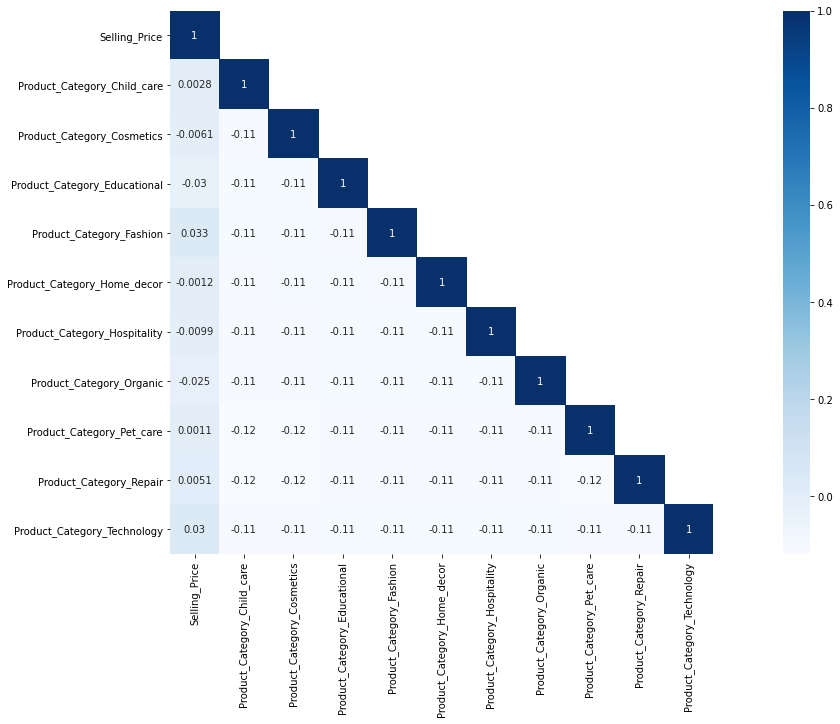

In [86]:
df1 = df[['Product_Category','Selling_Price']]
df_cat = pd.get_dummies(df1)
cor_mat = df_cat.corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)]=False
fig = plt.gcf()
fig.set_size_inches(25,10)
sns.heatmap(data = cor_mat, mask = mask,cmap="Blues" ,square = True, annot = True, cbar = True);

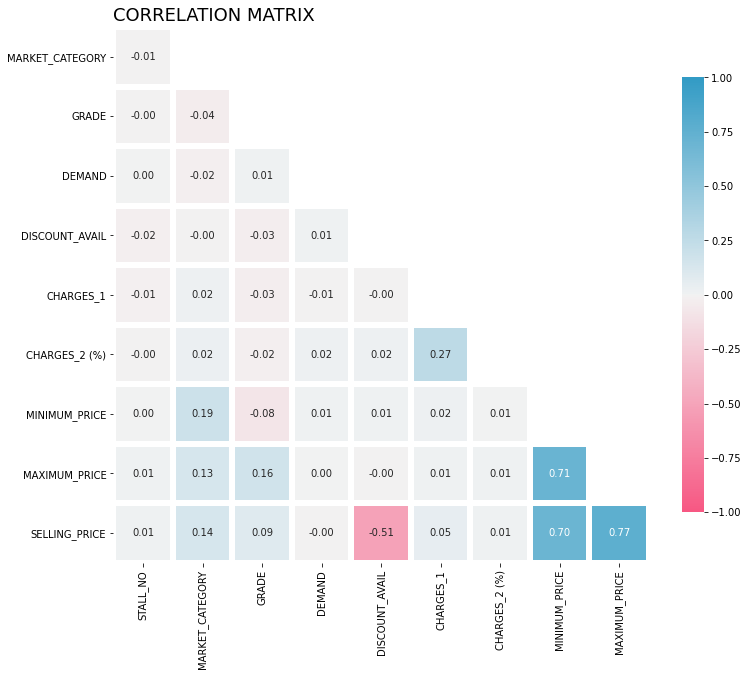

In [89]:
import matplotlib.pyplot as plt
import seaborn as sb
# get correlations
df_corr = df.corr()

fig, ax = plt.subplots(figsize=(12, 10))

# mask
mask = np.triu(np.ones_like(df_corr, dtype=np.bool))
# adjust mask and df
mask = mask[1:, :-1]
corr = df_corr.iloc[1:,:-1].copy()
# color map
cmap = sb.diverging_palette(0, 230, 90, 60, as_cmap=True)
# plot heatmap
sb.heatmap(corr, mask=mask, annot=True, fmt=".2f", 
           linewidths=5, cmap=cmap, vmin=-1, vmax=1, 
           cbar_kws={"shrink": .8}, square=True)
# ticks
yticks = [i.upper() for i in corr.index]
xticks = [i.upper() for i in corr.columns]
plt.yticks(plt.yticks()[0], labels=yticks, rotation=0)
plt.xticks(plt.xticks()[0], labels=xticks)
# title
title = 'CORRELATION MATRIX'
plt.title(title, loc='left', fontsize=18)
plt.show()

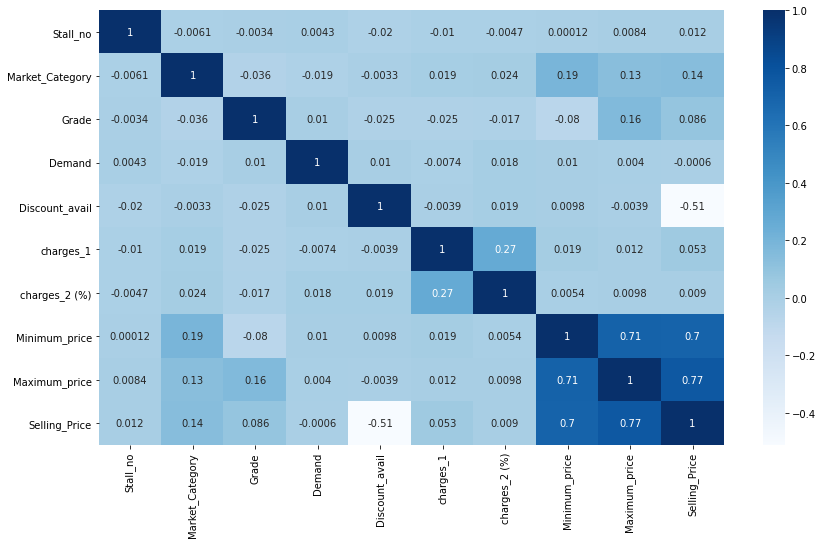

In [92]:
plt.figure(figsize=(14, 8))
_ = sns.heatmap(df.corr(), cmap="Blues",annot=True)

In [123]:
cross=pd.crosstab(index=df['Product_Category'],
            columns=df['Loyalty_customer'],
            values=df['Selling_Price'],
            aggfunc=np.mean).astype(int)

In [124]:
pd.crosstab(index=df['Product_Category'],
            columns=df['Loyalty_customer'])

Loyalty_customer,No,Yes
Product_Category,,
Child_care,241,417
Cosmetics,229,420
Educational,243,367
Fashion,229,375
Home_decor,259,358
Hospitality,259,373
Organic,255,365
Pet_care,260,422
Repair,259,417


<AxesSubplot:xlabel='Loyalty_customer', ylabel='Product_Category'>

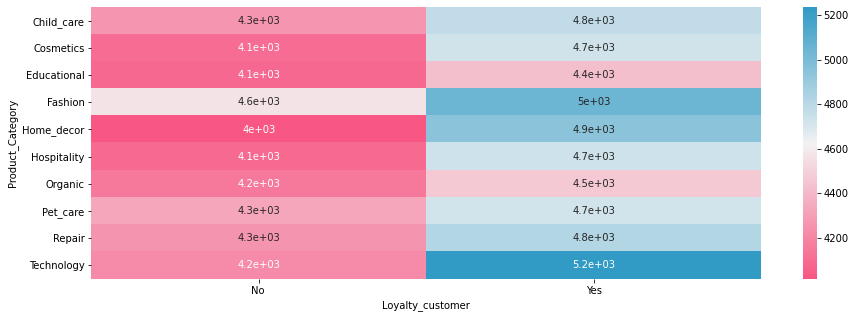

In [125]:
sns.heatmap(cross, cmap=cmap, annot=True)

In [115]:
# Using groupby
result = df.groupby('Product_Category')['Selling_Price'].sum().astype(int)
print(type(result))
#pandas.core.series.Series
result



<class 'pandas.core.series.Series'>


Product_Category
Child_care     3005189
Cosmetics      2903691
Educational    2596745
Fashion        2938590
Home_decor     2781491
Hospitality    2810125
Organic        2680494
Pet_care       3104780
Repair         3068901
Technology     2981625
Name: Selling_Price, dtype: int64

In [114]:

# Using pivot_table
result_pivot = df.pivot_table(values='Selling_Price', index='Product_Category', aggfunc=np.sum).astype(int)
print(type(result_pivot))

result_pivot

<class 'pandas.core.frame.DataFrame'>


,Selling_Price
Product_Category,
Child_care,3005189
Cosmetics,2903691
Educational,2596745
Fashion,2938590
Home_decor,2781491
Hospitality,2810125
Organic,2680494
Pet_care,3104780
Repair,3068901


In [116]:
multi_name = df.pivot_table(values='Selling_Price', index=['Stall_no', 'Product_Category','Loyalty_customer'], 
                              aggfunc=[np.mean, np.median, np.sum])
multi_name

mean        median  \
                                           Selling_Price Selling_Price   
Stall_no Product_Category Loyalty_customer                               
1.0      Child_care       No                 4712.289646   5234.120100   
                          Yes                5973.747649   3675.064889   
         Cosmetics        No                 4363.951328   4834.301184   
                          Yes                6287.251550   5839.236018   
         Educational      No                 3686.620373   2872.412928   
...                                                  ...           ...   
50.0     Pet_care         Yes                5537.903442   5463.392288   
         Repair           No                 4204.301372   3976.780350   
                          Yes                5121.626547   5534.478625   
         Technology       No                 4025.599900   4492.679400   
                          Yes                4505.049657   3350.199600   

                                                     sum  
                                           Selling_Price  
Stall_no Product_Category Loyalty_customer                
1.0      Child_care       No                23561.448232  
                          Yes               47789.981189  
         Cosmetics        No                21819.756642  
                          Yes               44010.760850  
         Educational      No                11059.861120  
...                                                  ...  
50.0     Pet_care         Yes               33227.420655  
         Repair           No                25225.808229  
                          Yes               30729.759281  
         Technology       No                16102.399599  
                          Yes               40545.446916  

[998 rows x 3 columns]

In [117]:
multi_name.stack()

mean  \
Stall_no Product_Category Loyalty_customer                              
1.0      Child_care       No               Selling_Price  4712.289646   
                          Yes              Selling_Price  5973.747649   
         Cosmetics        No               Selling_Price  4363.951328   
                          Yes              Selling_Price  6287.251550   
         Educational      No               Selling_Price  3686.620373   
...                                                               ...   
50.0     Pet_care         Yes              Selling_Price  5537.903442   
         Repair           No               Selling_Price  4204.301372   
                          Yes              Selling_Price  5121.626547   
         Technology       No               Selling_Price  4025.599900   
                          Yes              Selling_Price  4505.049657   

                                                               median  \
Stall_no Product_Category Loyalty_customer                              
1.0      Child_care       No               Selling_Price  5234.120100   
                          Yes              Selling_Price  3675.064889   
         Cosmetics        No               Selling_Price  4834.301184   
                          Yes              Selling_Price  5839.236018   
         Educational      No               Selling_Price  2872.412928   
...                                                               ...   
50.0     Pet_care         Yes              Selling_Price  5463.392288   
         Repair           No               Selling_Price  3976.780350   
                          Yes              Selling_Price  5534.478625   
         Technology       No               Selling_Price  4492.679400   
                          Yes              Selling_Price  3350.199600   

                                                                   sum  
Stall_no Product_Category Loyalty_customer                              
1.0      Child_care       No               Selling_Price  23561.448232  
                          Yes              Selling_Price  47789.981189  
         Cosmetics        No               Selling_Price  21819.756642  
                          Yes              Selling_Price  44010.760850  
         Educational      No               Selling_Price  11059.861120  
...                                                                ...  
50.0     Pet_care         Yes              Selling_Price  33227.420655  
         Repair           No               Selling_Price  25225.808229  
                          Yes              Selling_Price  30729.759281  
         Technology       No               Selling_Price  16102.399599  
                          Yes              Selling_Price  40545.446916  

[998 rows x 3 columns]

In [118]:
multi_name.stack(level=0)

Selling_Price
Stall_no Product_Category Loyalty_customer                      
1.0      Child_care       No               mean      4712.289646
                                           median    5234.120100
                                           sum      23561.448232
                          Yes              mean      5973.747649
                                           median    3675.064889
...                                                          ...
50.0     Technology       No               median    4492.679400
                                           sum      16102.399599
                          Yes              mean      4505.049657
                                           median    3350.199600
                                           sum      40545.446916

[2994 rows x 1 columns]

In [126]:
bins=[0,2000,4000,6000,8000,10000,12000,14000,24000] 
group=['b/w 0-2000','b/w 2000-4000','b/w 4000-6000','b/w 6000-8000','b/w 8000-10000','b/w 10000-12000','b/w 12000-14000','above 14000']
df['Selling_Price_bins']=pd.cut(df['Selling_Price'],bins,labels=group)

In [127]:
df.head()

,Stall_no,Market_Category,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price,Selling_Price_bins
0,37.0,2,Yes,Fashion,1,68,0.0,376.0,11.0,2983.0,4713.0,4185.947700,b/w 4000-6000
1,38.0,24,Yes,Fashion,0,51,0.0,397.0,12.0,7495.0,10352.0,9271.490256,b/w 8000-10000
2,9.0,447,Yes,Child_care,0,10,0.0,250.0,9.0,5752.0,7309.0,6785.701362,b/w 6000-8000
3,50.0,23,Yes,Educational,2,48,0.0,144.0,13.0,5090.0,20814.0,13028.917824,b/w 12000-14000
4,7.0,63,Yes,Repair,1,35,1.0,211.0,4.0,2430.0,9261.0,906.553935,b/w 0-2000


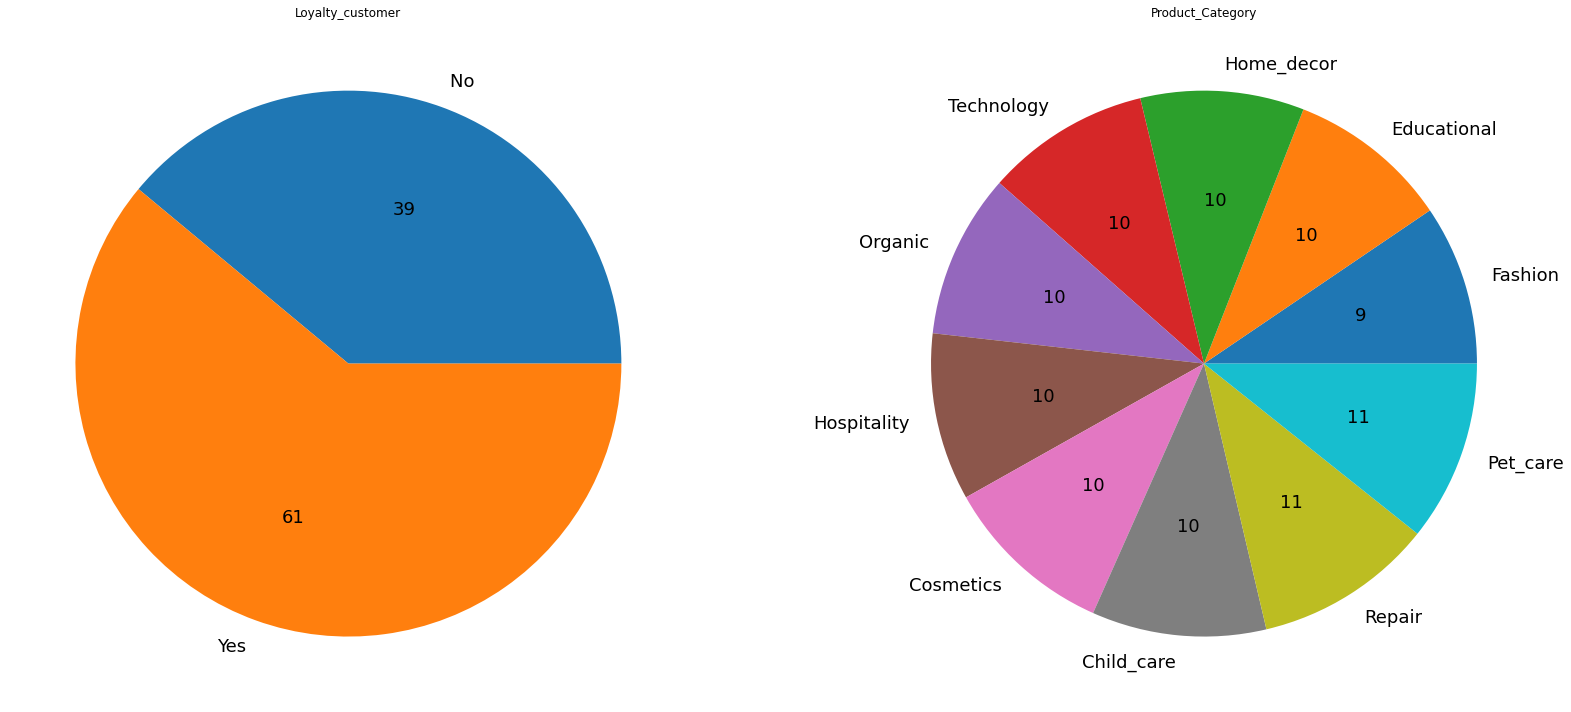

In [128]:
fig, axes = plt.subplots(1, 2, figsize=(24, 10))

for i, c in enumerate(['Loyalty_customer', 'Product_Category']):
    _ = df[c].value_counts()[::-1].plot(kind = 'pie', ax=axes[i], title=c, autopct='%.0f', fontsize=18)
    _ = axes[i].set_ylabel('')
    
_ = plt.tight_layout()